### Mark J Serena - mjserena@wm.edu
### DATA 340-03 EDA Assignment

# Exploratory Data Analysis

Understanding our data is a crucial step in any data science project. In this assignment, you will perform an exploratory data analysis of corpus of documents. The corpus consists of 11,587 documents, each of which is a news article. The documents are stored in a folder called `data` in the root of the repository and the data is stored in the shared google drive `datasets`.

In this assignment, you will analyze a corpus of news documents to answer the following questions:

0. What is the nature of our data?
    - 0a. What is the size of the corpus?
    - 0b. Are there any duplicates in the corpus? If so, drop them.
    - 0c. Are there any missing values in the corpus?
    - 0d. How many unique documents are there in the corpus?
1. What is the distribution of `token`s per document?
    - 1a. What is the longest article?
    - 1b. What is the shortest article?
    - 1c. What is the 95th percentile of article lengths?
2. How many different sources are there in the corpus?
    - 2a. How many different sources are there in the dataset?
    - 2b. What is the distribution of articles per source?

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import re

tqdm.pandas()

## News Corpus

You are provided the following news corpus: `data/news_corpus.csv`. The corpus contains the following columns:

- `index` int: The unique identifier of the document.
- `source` str: The source of the document
- `title` str: The title of the document
- `text` str: The content of the article

The data used in this notebook comes from the [`StoryGraph`](https://archive.org/details/storygraph?tab=about) project, created and maintained by Prof. Alexander Nwala.

```BibTeX
@MISC {nwala-cj20,
    author = {Alexander Nwala and Michele C. Weigle and Michael L. Nelson},
     title = {365 Dots in 2019: Quantifying Attention of News Sources},
     year = {2020},
      month = may,
     howpublished = {Poster/demo accepted at the Computation + Journalism Symposium (symposium cancelled due to COVID-19)},
     arxiv = {https://arxiv.org/abs/2003.09989},
     pubdate = {202005}
}
```

## Load Data into Pandas dataframe

In [2]:
df = pd.read_csv('data/news-2023-02-01.csv')
df.head(10)

,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...
5,vox,What layoffs at Google and other tech companie...,The path forward for tech workers won’t be eas...
6,vox,Did Republican Representative-elect George San...,New York Representative-elect George Santos sp...
7,vox,Sundance 2023: 17 movies to watch out for this...,Chiwetel Ejiofor and Emilia Clarke in The Pod ...
8,huffpost,Watch Trump Give Deposition In New York Civil ...,Watch Trump Give Deposition In New York Civil ...
9,huffpost,Ron DeSantis Plans To Defund Diversity Program...,Politics Florida Ron DeSantis higher education...


## 0. What is the nature of our data?

Using your coding skills, answer the following questions. Please comment on your code and results.

In [3]:
## 0a. What is the size of the corpus?

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11587 entries, 0 to 11586
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  11587 non-null  object
 1   title   11586 non-null  object
 2   text    11419 non-null  object
dtypes: object(3)
memory usage: 271.7+ KB


(11587, 3)

In [4]:
## 0b. Are there any duplicates in the corpus? If so, remove or drop them.

# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = df.duplicated(keep='first')

print('True = duplicate, False = not a duplicate')
print(bool_series.value_counts())

True = duplicate, False = not a duplicate
True     10397
False     1190
dtype: int64


In [5]:
# dropping duplicate values
df_deduped = df.drop_duplicates(keep='first')
df_deduped.info()

print('after deduping', df_deduped.shape, 'vs', 'before deduping',df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 11586
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  1190 non-null   object
 1   title   1189 non-null   object
 2   text    1185 non-null   object
dtypes: object(3)
memory usage: 37.2+ KB
after deduping (1190, 3) vs before deduping (11587, 3)


In [6]:
df_deduped

,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...
...,...,...,...
11500,thehill,"White House bids farewell to Klain, as Zients ...","White House bids farewell to Klain, as Zients ..."
11543,thehill,Lawmakers clash over allowing guns in Natural ...,Lawmakers clash over allowing guns in Natural ...
11559,westernjournal,Pizza Shop Employee Gets Rude Awakening After ...,Pizza Shop Employee Gets Rude Awakening After ...
11560,westernjournal,White House Accused of 'Dishonesty and Evasive...,President Joe Biden boards Air Force One at th...


In [7]:
## 0c. Are there any missing values in the corpus? If so, what data are missing?
## Should the missing values be removed, explain?

count_nan = df_deduped['source'].isna().sum()
print ('Count of NaN in source column: ' + str(count_nan))

count_nan = df_deduped['title'].isna().sum()
print ('Count of NaN in title column: ' + str(count_nan))

count_nan = df_deduped['text'].isna().sum()
print ('Count of NaN in text column: ' + str(count_nan))

Count of NaN in source column: 0
Count of NaN in title column: 1
Count of NaN in text column: 5


In [8]:
df_dropped = df_deduped.dropna(subset=['text'])
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 11586
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  1185 non-null   object
 1   title   1185 non-null   object
 2   text    1185 non-null   object
dtypes: object(3)
memory usage: 37.0+ KB


## 1.0 What is the distribution of `token`s per document?

Use the `spaCy` library to tokenize the text and analyze the distribution of token frequencies. You can use the `Counter` class from the `collections` library to count the number of times each token appears in the corpus.

In [9]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the spacy model: nlp
NLP = spacy.load('en_core_web_sm')

corpus_df = df_dropped.copy()
corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 11586
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  1185 non-null   object
 1   title   1185 non-null   object
 2   text    1185 non-null   object
dtypes: object(3)
memory usage: 37.0+ KB


In [10]:
## Generate the tokens using Spacy

# Before tokens lets convert text to lower case and remove punctuation
# Doing this old school, indexing row by row
# Anything that isn't a letter or a number is removed
corpus_df['text_clean'] = ''
import re
for i in corpus_df.index:
    text_lc = corpus_df['text'][i].lower()
    text_lc = text_lc.replace('\n',' ')
    corpus_df['text_clean'][i] = re.sub('[^a-zA-Z0-9 ]','',text_lc)

# Tokenize the text
# By the way, I hate lambdas almost as much as regular expressions
corpus_df['tokens'] = corpus_df['text_clean'].apply(lambda x: [token.text for token in NLP(x)])
corpus_df


,source,title,text,text_clean,tokens
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,manhattan prosecutors are likely to notice tha...,"[manhattan, prosecutors, are, likely, to, noti..."
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...,print investigators looking into donald trumps...,"[print, investigators, looking, into, donald, ..."
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...,the ap reported republican rep george santos o...,"[the, ap, reported, republican, rep, george, s..."
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...,rachel maddow showed how trump committed a cri...,"[rachel, maddow, showed, how, trump, committed..."
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...,candles are placed in front of a photo of cine...,"[candles, are, placed, in, front, of, a, photo..."
...,...,...,...,...,...
11500,thehill,"White House bids farewell to Klain, as Zients ...","White House bids farewell to Klain, as Zients ...",white house bids farewell to klain as zients o...,"[white, house, bids, farewell, to, klain, as, ..."
11543,thehill,Lawmakers clash over allowing guns in Natural ...,Lawmakers clash over allowing guns in Natural ...,lawmakers clash over allowing guns in natural ...,"[lawmakers, clash, over, allowing, guns, in, n..."
11559,westernjournal,Pizza Shop Employee Gets Rude Awakening After ...,Pizza Shop Employee Gets Rude Awakening After ...,pizza shop employee gets rude awakening after ...,"[pizza, shop, employee, gets, rude, awakening,..."
11560,westernjournal,White House Accused of 'Dishonesty and Evasive...,President Joe Biden boards Air Force One at th...,president joe biden boards air force one at th...,"[president, joe, biden, boards, air, force, on..."


In [11]:
## Count the tokens

# Let's get an understanding of the length of the articles
# By the way, I hate lambdas almost as much as regular expressions
corpus_df['word_total'] = corpus_df['tokens'].apply(lambda x: len(x))
#corpus_df['word_total'] = corpus_df['text_clean'].apply(lambda x: len(x.split(' ')))
corpus_df

,source,title,text,text_clean,tokens,word_total
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,manhattan prosecutors are likely to notice tha...,"[manhattan, prosecutors, are, likely, to, noti...",302
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...,print investigators looking into donald trumps...,"[print, investigators, looking, into, donald, ...",833
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...,the ap reported republican rep george santos o...,"[the, ap, reported, republican, rep, george, s...",267
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...,rachel maddow showed how trump committed a cri...,"[rachel, maddow, showed, how, trump, committed...",546
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...,candles are placed in front of a photo of cine...,"[candles, are, placed, in, front, of, a, photo...",2666
...,...,...,...,...,...,...
11500,thehill,"White House bids farewell to Klain, as Zients ...","White House bids farewell to Klain, as Zients ...",white house bids farewell to klain as zients o...,"[white, house, bids, farewell, to, klain, as, ...",632
11543,thehill,Lawmakers clash over allowing guns in Natural ...,Lawmakers clash over allowing guns in Natural ...,lawmakers clash over allowing guns in natural ...,"[lawmakers, clash, over, allowing, guns, in, n...",329
11559,westernjournal,Pizza Shop Employee Gets Rude Awakening After ...,Pizza Shop Employee Gets Rude Awakening After ...,pizza shop employee gets rude awakening after ...,"[pizza, shop, employee, gets, rude, awakening,...",748
11560,westernjournal,White House Accused of 'Dishonesty and Evasive...,President Joe Biden boards Air Force One at th...,president joe biden boards air force one at th...,"[president, joe, biden, boards, air, force, on...",855


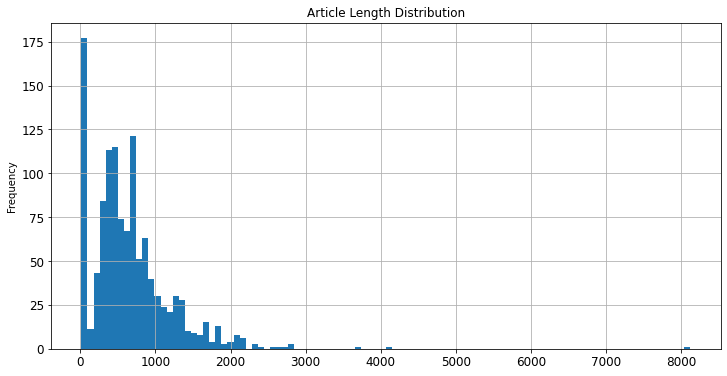

In [12]:
# Our distribution article length
#

ax = (corpus_df['word_total']).plot(kind='hist', bins=100, figsize = (12,6), fontsize = 12)
plt.title('Article Length Distribution', fontsize=12)
plt.grid()
plt.show()
## Plot the distribution of the number of tokens per document




In [13]:
## 1a. What is the longest article?


article_length = corpus_df['word_total'].max()
print('longest article is',article_length)
corpus_df.loc[(corpus_df['word_total'] == article_length)]

longest article is 8121


,source,title,text,text_clean,tokens,word_total
10016,nytimes,Women Have Been Misled About Menopause - The N...,Credit...Marta Blue for The New York Times\nSe...,creditmarta blue for the new york times sectio...,"[creditmarta, blue, for, the, new, york, times...",8121


In [14]:
## 1b. What is the shortest article?


article_length = corpus_df['word_total'].min()
print('shortest article is',article_length)
corpus_df.loc[(corpus_df['word_total'] == article_length)]

shortest article is 13


,source,title,text,text_clean,tokens,word_total
10037,realclearpolitics,The GOP Is Just Obnoxious | RealClearPolitics,"The GOP Is Just Obnoxious\nDavid Frum , The At...",the gop is just obnoxious david frum the atla...,"[the, gop, is, just, obnoxious, david, frum, ...",13


In [15]:
## 1c. What is the 95th percentile of the number of tokens per document?
## Hint: use np.percentile

# what's the f?
f"The 95th percentile of the number of tokens per doc is: {np.percentile(corpus_df['word_total'].tolist(), 95)} words"

'The 95th percentile of the number of tokens per doc is: 1665.8 words'

In [16]:
## 1d. What is the size of the vocabulary and the frequencies of each token in the corpus?

import string
from collections import Counter


## Create list of stopwords from spacy
stop_words = list(spacy.lang.en.stop_words.STOP_WORDS) + list(string.punctuation)

# technically the punctuation has already been removed
# so we don't really need the string.punctuation

# "[word for word in...]" is list comprehension
# list comprehension consists of brackets containing the expression, 
# which is executed for each element along with the for loop to iterate over each element in the list. 
# The result will be a new list 

corpus_df['tokens_unstopped'] = corpus_df['tokens'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

# Counter requires a list of words or tokens
counter_dict = Counter((' '.join(corpus_df['tokens_unstopped'])).split())
print('it appears there are', len(counter_dict), 'unique words in the corpus')

print(counter_dict)

it appears there are 23286 unique words in the corpus
Counter({'said': 4550, 'biden': 2083, 'house': 1969, 'new': 1914, 'president': 1774, 'nt': 1746, 'story': 1647, 'advertisement': 1639, 'continues': 1419, '2023': 1273, 's': 1253, 'news': 1213, 'according': 1125, 'people': 1107, 'like': 1039, 'trump': 1035, 'time': 1022, 'state': 956, 'white': 921, 'republicans': 899, 'police': 880, 'tuesday': 868, 'committee': 844, 'years': 843, 'year': 820, 'public': 802, 'bidens': 795, 'ukraine': 788, 'republican': 784, 'states': 765, 'mccarthy': 764, '1': 751, 'wednesday': 751, 'mr': 729, 'january': 702, 'american': 691, 'told': 690, 'government': 681, 'debt': 664, 'security': 645, 'ukrainian': 637, 'percent': 631, 'office': 618, 'officials': 610, 'school': 606, 'use': 604, 'rep': 592, 'federal': 591, 'russia': 588, 'black': 587, 'including': 586, 'health': 585, 'statement': 581, 'national': 568, 'policy': 558, 'meeting': 547, 'think': 546, 'found': 545, 'desantis': 543, 'documents': 536, 'week':

## 2.0 How many different sources are there in the corpus?

Please describe how many different sources exist in the dataset.

In [17]:
## 2a. Plot how many different sources are there in the corpus?

# Using groupby() and count()
sources = corpus_df.groupby(['source'])['source'].count()
print('There are', len(sources), 'different sources in the corpus')
print(sources)


There are 20 different sources in the corpus
source
abcnews.go               43
breitbart                43
checkyourfact.com         2
cnn                      84
dailycaller              53
foxnews                 106
huffpost                 54
msnbc                    30
nytimes                  75
politico                 46
politico.eu               1
politicususa             15
realclearmarkets.com      1
realclearpolitics        17
thegatewaypundit         88
thehill                 218
vox                      23
washingtonexaminer       12
washingtonpost           62
westernjournal          212
Name: source, dtype: int64


In [18]:
## 2b. Plot the distribution of articles per source?
## hint: use seaborn boxplot


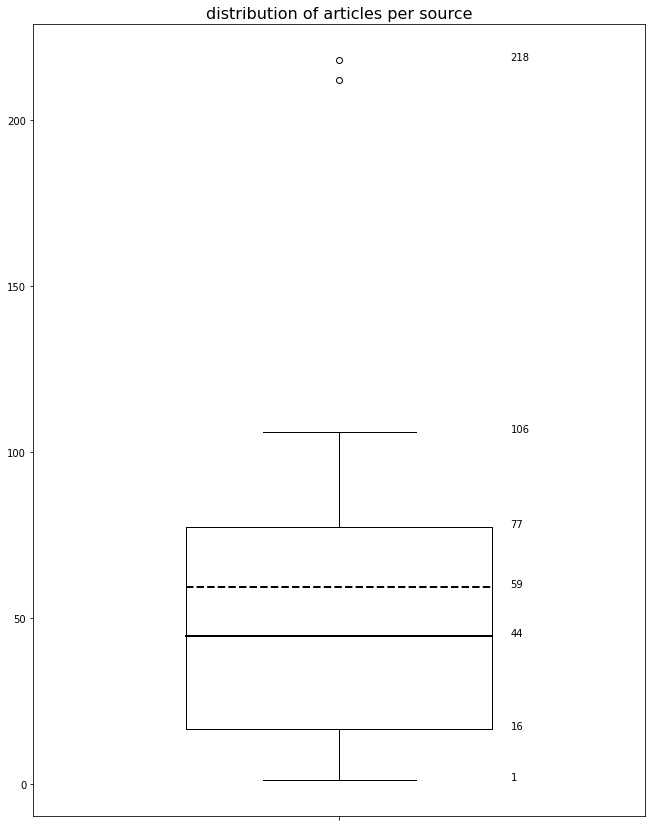

In [19]:
# Code from DATA 211 - Data Visualization
# Boxplots for everyone!

# create values / labels for articles per source (aka aps)
aps = sources

mean_aps = np.mean(aps)
max_aps = np.max(aps)
p50_aps = np.median(aps)
p75_aps = np.percentile(aps, 75)
p25_aps = np.percentile(aps, 25)

# calculation to determine value of the whiskers
# upper whisker of the box plot is the largest dataset number 
# smaller than 1.5IQR above the third quartile
# first calculate IQR (p75 - p25)
iqr = p75_aps - p25_aps

# examine values greater than p75 + 1.5IQR 
# find the max value in those numbers
uw_aps = aps[aps<=p75_aps+1.5*iqr].max()
lw_aps = aps[aps>=p25_aps-1.5*iqr].min()

labels_aps = [lw_aps, p25_aps, p50_aps, mean_aps, p75_aps, uw_aps, max_aps]

# create the figure
fig = plt.figure(figsize=(8.5, 11)) 
  
# creating axes instance 
# don't understand the array, need to explore that further
ax = fig.add_axes([0, 0, 1, 1])

# remove x-axis labels
ax.set(xlabel=None)

# experimenting with box plot properties
# just to see that what it produces
meanprops = dict(linestyle='dashed', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='black')
whiskerprops = dict()
boxprops = dict()

# creating box plot 
bp = ax.boxplot(sources, showmeans=True, meanline=True, meanprops=meanprops, medianprops=medianprops,
                widths = 0.5)  

# get current axes
ax = plt.gca() 

# loop thru values to produce lables
for i in labels_aps:
    label = int(round(i))
    ax.text(1.28, i, label)
ax.set(xticklabels=[])

# add a title
plt.title('distribution of articles per source', fontsize=16)

# show plot 
plt.show() 
